In [1]:
from keras.models import Sequential
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [12]:
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
ColumnNames = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]

In [3]:
training_dataset = pd.read_csv('glass.csv',names = ColumnNames, header = 0)
training_dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
df = training_dataset.drop("Type", axis=1)
y = training_dataset["Type"]
df = df.sample(frac=1)

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
153,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.00,0.00
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


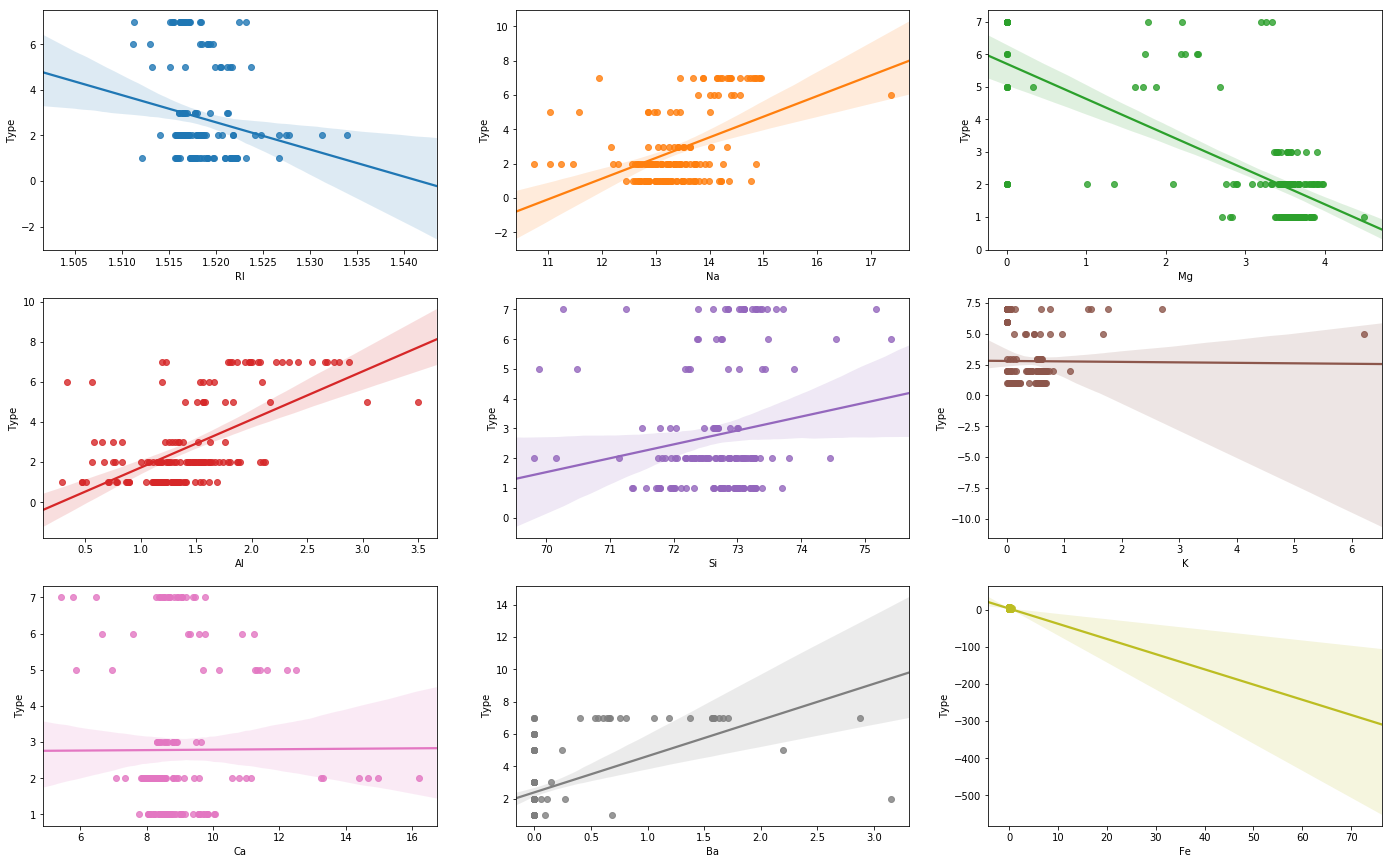

In [6]:
train_data_frame, test_data_frame = train_test_split(training_dataset, test_size=0.2)
figure, ax = plt.subplots(3,3, figsize=(24,15))
sns.regplot(x=train_data_frame["RI"], y=train_data_frame["Type"], ax=ax[0,0])
sns.regplot(x=train_data_frame["Na"], y=train_data_frame["Type"], ax=ax[0,1])
sns.regplot(x=train_data_frame["Mg"], y=train_data_frame["Type"], ax=ax[0,2])
sns.regplot(x=train_data_frame["Al"], y=train_data_frame["Type"], ax=ax[1,0])
sns.regplot(x=train_data_frame["Si"], y=train_data_frame["Type"], ax=ax[1,1])
sns.regplot(x=train_data_frame["K"], y=train_data_frame["Type"], ax=ax[1,2])
sns.regplot(x=train_data_frame["Ca"], y=train_data_frame["Type"], ax=ax[2,0])
sns.regplot(x=train_data_frame["Ba"], y=train_data_frame["Type"], ax=ax[2,1])
sns.regplot(x=train_data_frame["Fe"], y=train_data_frame["Type"], ax=ax[2,2])

In [7]:
kategoricka_premenna = np_utils.to_categorical(y)

In [11]:
model = Sequential()
model.add(Dense(units=9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units=5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(df, kategoricka_premenna)
scores = model.evaluate(df, kategoricka_premenna)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
211  1.52065  14.36  0.00  2.02  73.42  0.00   8.44  1.64  0.00
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
153  1.51610  13.42  3.40  1.22  72.69  0.59   8.32  0.00  0.00
96   1.51841  13.02  3.62  1.06  72.34  0.64   9.13  0.00  0.15
194  1.51683  14.56  0.00  1.98  73.29  0.00   8.52  1.57  0.07
177  1.51937  13.79  2.41  1.19  72.76  0.00   9.77  0.00  0.00
141  1.51851  13.20  3.63  1.07  72.83  0.57   8.41  0.09  0.17
65   1.52099  13.69  3.59  1.12  71.96  0.09   9.40  0.00  0.00
145  1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00
70   1.51574  14.86  3.67  1.74  71.87  0.16   7.36  0.00  0.12
15   1.51761  12.81  3.54  1.23  73.24  0.58   8.39  0.00  0.00
142  1.51662  12.85  3.51  1.44  73.01  0.68   8.23  0.06  0.25
95   1.51860  13.36  3.43  1.43  72.26  0.51   8.60  0.00  0.00
34   1.51783  12.69  3.54  1.34  72.95  0.57   8.75  0.00  0.00
151  1.52127  14.32  3.90  0.83  71.50  0.00   9.49  0.00  0.00
4    1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00
109  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00  0.00
130  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00  0.00
120  1.51844  13.25  3.76  1.32  72.40  0.58   8.42  0.00  0.00
58   1.51754  13.48  3.74  1.17  72.99  0.59   8.03  0.00  0.00
148  1.51670  13.24  3.57  1.38  72.70  0.56   8.44  0.00  0.10
92   1.51588  13.12  3.41  1.58  73.26  0.07   8.39  0.00  0.19
21   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.00  0.00
59   1.51754  13.39  3.66  1.19  72.79  0.57   8.27  0.00  0.11
36   1.51909  13.89  3.53  1.32  71.81  0.51   8.78  0.11  0.00
201  1.51653  11.95  0.00  1.19  75.18  2.70   8.93  0.00  0.00
190  1.51613  13.88  1.78  1.79  73.10  0.00   8.67  0.76  0.00
209  1.51623  14.14  0.00  2.88  72.61  0.08   9.18  1.06  0.00
42   1.51779  13.21  3.39  1.33  72.76  0.59   8.59  0.00  0.00
..       ...    ...   ...   ...    ...   ...    ...   ...   ...
80   1.51592  12.86  3.52  2.12  72.66  0.69   7.97  0.00  0.00
122  1.51687  13.23  3.54  1.48  72.84  0.56   8.10  0.00  0.00
143  1.51709  13.00  3.47  1.79  72.72  0.66   8.18  0.00  0.00
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10
206  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11
73   1.51631  13.34  3.57  1.57  72.87  0.61   7.89  0.00  0.00
126  1.51667  12.94  3.61  1.26  72.75  0.56   8.60  0.00  0.00
203  1.51658  14.80  0.00  1.99  73.11  0.00   8.28  1.71  0.00
181  1.51888  14.99  0.78  1.74  72.50  0.00   9.95  0.00  0.00
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00
40   1.51793  12.79  3.50  1.12  73.03  0.64   8.77  0.00  0.00
30   1.51768  12.65  3.56  1.30  73.08  0.61   8.69  0.00  0.14
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00
7    1.51756  13.15  3.61  1.05  73.24  0.57   8.24  0.00  0.00
12   1.51589  12.88  3.43  1.40  73.28  0.69   8.05  0.00  0.24
20   1.51750  12.82  3.55  1.49  72.75  0.54   8.52  0.00  0.19
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00
144  1.51660  12.99  3.18  1.23  72.97  0.58   8.81  0.00  0.24
88   1.51618  13.01  3.50  1.48  72.89  0.60   8.12  0.00  0.00
53   1.51837  13.14  2.84  1.28  72.85  0.55   9.07  0.00  0.00
48   1.52223  13.21  3.77  0.79  71.99  0.13  10.02  0.00  0.00
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.00  0.00
66   1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.00  0.17
118  1.51673  13.30  3.64  1.53  72.53  0.65   8.03  0.00  0.29
187  1.52315  13.44  3.34  1.23  72.38  0.60   8.83  0.00  0.00
33   1.51753  12.57  3.47  1.38  73.39  0.60   8.55  0.00  0.06
0    1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00
133  1.51800  13.71  3.93  1.54  71.81  0.54   8.21  0.00  0.15
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31

[214 rows x 9 columns]

In [ ]:
print("\nPresnosť siete: %.2f%%" %(scores[1]*100))